In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats


In [19]:
# train 파일과 label (결론적으로 보려는 지표) 불러오기
# 코딩 파일과 train test 파일이 같은 폴더안에 있기에 경로 설정
df_train = pd.read_csv("train.csv")
label = pd.read_csv('train_label.csv')

df_test = pd.read_csv('test.csv')
test_label=pd.read_csv('test_label.csv')


#train df의 index 행 내용을 label df의 credit 행 내용으로 바꾸기
df_train['index'] = label['credit']
##train df의 index column 이름을 credit으로 변경
df_train.rename(columns={'index':'credit'}, inplace=True)
# 데이터 값 실수. 소수점 넷째자리까지 표시
pd.options.display.float_format = '{:.4f}'.format
# train df 출력
df_train

,credit,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,F,Y,Y,0,202500.0000,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,NaN,2,-53
1,0,F,N,N,1,157500.0000,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26
2,1,M,Y,N,0,135000.0000,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9
3,1,F,Y,N,2,112500.0000,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,1,0,1,0,Security staff,4,-12
4,1,M,Y,Y,1,225000.0000,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,1,0,0,0,Drivers,3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13223,1,F,N,N,0,225000.0000,Working,Secondary / secondary special,Widow,House / apartment,-20657,-5637,1,0,0,0,Accountants,1,-43
13224,1,F,Y,Y,0,292500.0000,Commercial associate,Higher education,Married,House / apartment,-18409,-3482,1,0,0,0,Sales staff,2,-53
13225,1,F,N,Y,0,135000.0000,Working,Secondary / secondary special,Civil marriage,House / apartment,-14625,-7827,1,0,1,1,NaN,2,-34
13226,1,M,N,Y,1,157500.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-10676,-2326,1,0,1,1,Laborers,3,-16


In [20]:
# 19가지의 항목이 겹치는 사람은 없다고 보고 중복치라고 가정한다.
#drop_duplicates 함수를 이용하여 첫번째 값을 제외하고 중복치를 모두 날린다.
print(df_train.duplicated().value_counts())
print(df_train.count())
# 488개의 중복이 존재.
df_train = df_train.drop_duplicates(keep='first')
df_train.info()

False    12740
True       488
dtype: int64
credit           13228
gender           13228
car              13228
reality          13228
child_num        13228
income_total     13228
income_type      13228
edu_type         13228
family_type      13228
house_type       13228
DAYS_BIRTH       13228
DAYS_EMPLOYED    13228
FLAG_MOBIL       13228
work_phone       13228
phone            13228
email            13228
occyp_type        9096
family_size      13228
begin_month      13228
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12740 entries, 0 to 13227
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   credit         12740 non-null  int64  
 1   gender         12740 non-null  object 
 2   car            12740 non-null  object 
 3   reality        12740 non-null  object 
 4   child_num      12740 non-null  int64  
 5   income_total   12740 non-null  float64
 6   income_type    12740 non-null  object 
 7

In [21]:
# train 데이터의 상태를 확인한다
print(df_train.describe(),'\n')

#train 데이터의 null값이 총 몇개인지 확인한다.
df_train.isnull().sum()



          credit  child_num  income_total  DAYS_BIRTH  DAYS_EMPLOYED  \
count 12740.0000 12740.0000    12740.0000  12740.0000     12740.0000   
mean      0.8763     0.4281   188416.7827 -15958.8599     59971.1496   
std       0.3293     0.7408   103213.9653   4200.8499    138263.2365   
min       0.0000     0.0000    27000.0000 -25152.0000    -15713.0000   
25%       1.0000     0.0000   121500.0000 -19426.0000     -3150.0000   
50%       1.0000     0.0000   157500.0000 -15519.0000     -1539.0000   
75%       1.0000     1.0000   225000.0000 -12454.0000      -401.0000   
max       1.0000    14.0000  1575000.0000  -7705.0000    365243.0000   

       FLAG_MOBIL  work_phone      phone      email  family_size  begin_month  
count  12740.0000  12740.0000 12740.0000 12740.0000   12740.0000   12740.0000  
mean       1.0000      0.2290     0.2955     0.0903       2.1929     -26.1363  
std        0.0000      0.4202     0.4563     0.2867       0.9100      16.5750  
min        1.0000      0.0000  

credit              0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3976
family_size         0
begin_month         0
dtype: int64

In [22]:
# FLAG_MOBIL(핸드폰 소유여부)가 모두 0 임으로 무의미한 데이터라서 해당 column을 날렸다
df_train = df_train.drop(labels='FLAG_MOBIL',axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12740 entries, 0 to 13227
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   credit         12740 non-null  int64  
 1   gender         12740 non-null  object 
 2   car            12740 non-null  object 
 3   reality        12740 non-null  object 
 4   child_num      12740 non-null  int64  
 5   income_total   12740 non-null  float64
 6   income_type    12740 non-null  object 
 7   edu_type       12740 non-null  object 
 8   family_type    12740 non-null  object 
 9   house_type     12740 non-null  object 
 10  DAYS_BIRTH     12740 non-null  int64  
 11  DAYS_EMPLOYED  12740 non-null  int64  
 12  work_phone     12740 non-null  int64  
 13  phone          12740 non-null  int64  
 14  email          12740 non-null  int64  
 15  occyp_type     8764 non-null   object 
 16  family_size    12740 non-null  int64  
 17  begin_month    12740 non-null  int64  
dtypes: flo

In [23]:
# 직업유형 행의 상태를 확인한다.
print(df_train['occyp_type'].describe())

#결측치가 있음을 확인하였다.


count         8764
unique          18
top       Laborers
freq          2181
Name: occyp_type, dtype: object


In [24]:
# 직업유형의NULL들을 'No'값으로 변경해준다.
df_train['occyp_type'] = df_train['occyp_type'].fillna('No')

# 직업이 있는 상태지만 (='DAYS_EMPLOYED' 값이 음수) 직업 유형이 결측되어 있던 경우 (='occyp_type'가 빈칸이였던 경우)는 Unknown으로 변경
df_train.loc[(df_train['DAYS_EMPLOYED'] < 0) & (df_train['occyp_type'] == 'No'), 'occyp_type'] = 'Unknown'

# 무직자와 직업은 있지만 직업 유형이 결측된 값을 구별하는 과정이다.

df_train['occyp_type'].isnull().sum()
#직업유형의 결측치가 없음을 확인한다.

0

In [25]:
# 머신러닝을 믿지 못하고 눈으로 유의미한 데이터를 찾아보려한 시도
# print(df_train.query('occyp_type == "Unknown"')[['credit','occyp_type']].value_counts())

# print(df_train.query('occyp_type == "No"')[['credit','occyp_type']].value_counts())

# print( 212/(1673+212), 279/(1968+279))

# rate = 1611/(1611+11617)
# print(1-rate)
# df_train.groupby('DAYS_EMPLOYED').agg( 평균신용도 = ('credit','mean'))
# df_train.groupby('DAYS_BIRTH').agg( 평균신용도 = ('credit','mean'))
# df_train["DAYS_BIRTH"].describe()

# print( df_train['credit'].value_counts())
# print(1611/(1611+11617))

# print(df_train.query('DAYS_BIRTH < -19406.5 ')[['credit']].value_counts())
# print( 376/(2931+376), 19406.5/365,'세 미만')
# print(df_train.query(' -19406.5 < DAYS_BIRTH < -15521 ')['credit'].value_counts())
# print( 400/(400+2907), 19406.5/365, '이상', 15521/365, '미만')
# print(df_train.query(' -15521 < DAYS_BIRTH < -12454 ')['credit'].value_counts())
# print(457/(457+2842), 15521/365, '이상', 12454/365, '미만')
# print(df_train.query(' -12454 < DAYS_BIRTH ')['credit'].value_counts())
# print(376/2930, 12454/365, '이상')


이상치 처리 - 수치형 변수에 이상치가 있는지 확인

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns


In [27]:
# 수치형 변수 columns를 feature에 저장한다.
features = df_train[['income_total','DAYS_BIRTH','DAYS_EMPLOYED','begin_month']]


# train df의 모양을 확인한다
print('이상치 처리 전 shape : {}'.format(df_train.shape))


이상치 처리 전 shape : (12740, 18)


/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/1769665720.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.


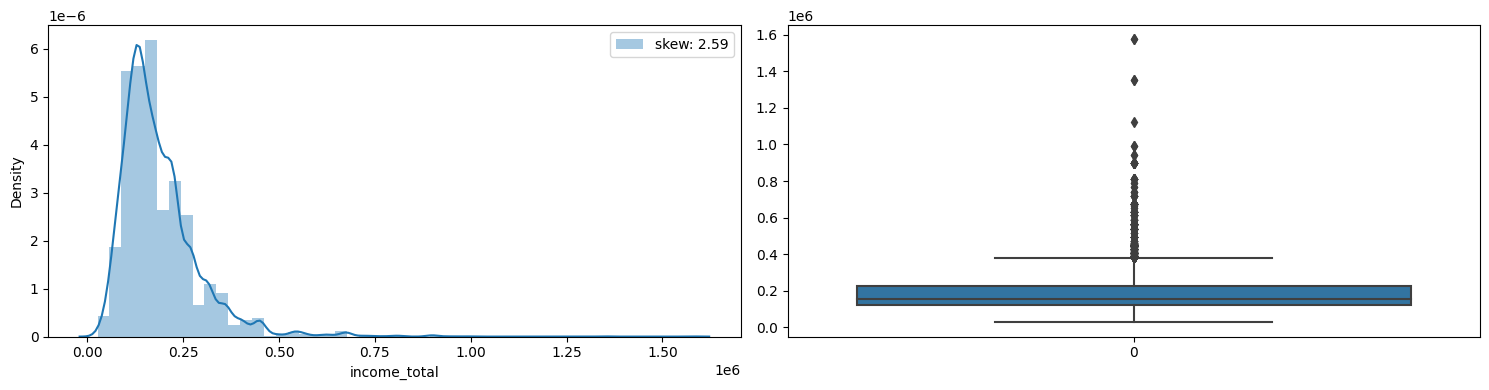

/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/1769665720.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.


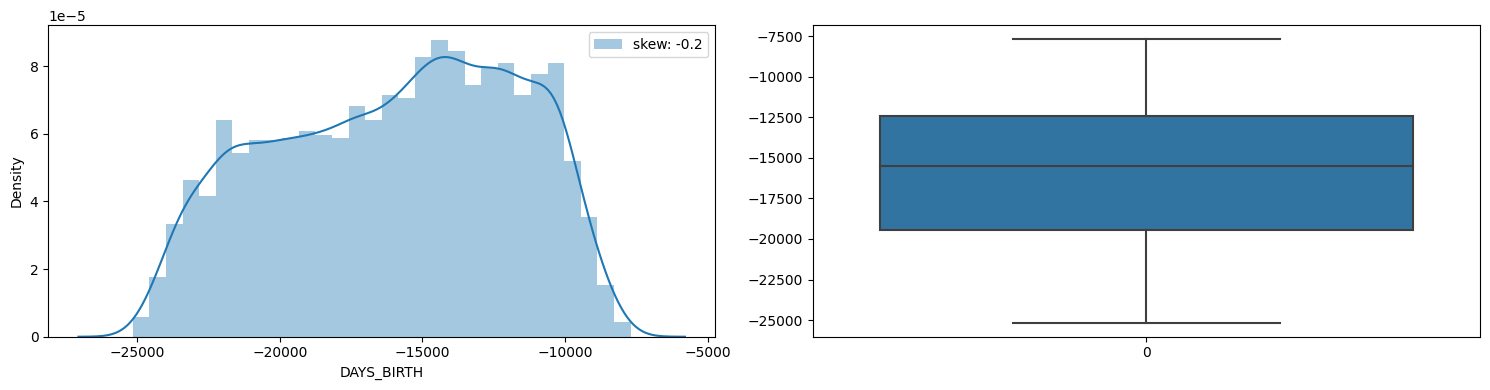

/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/1769665720.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.


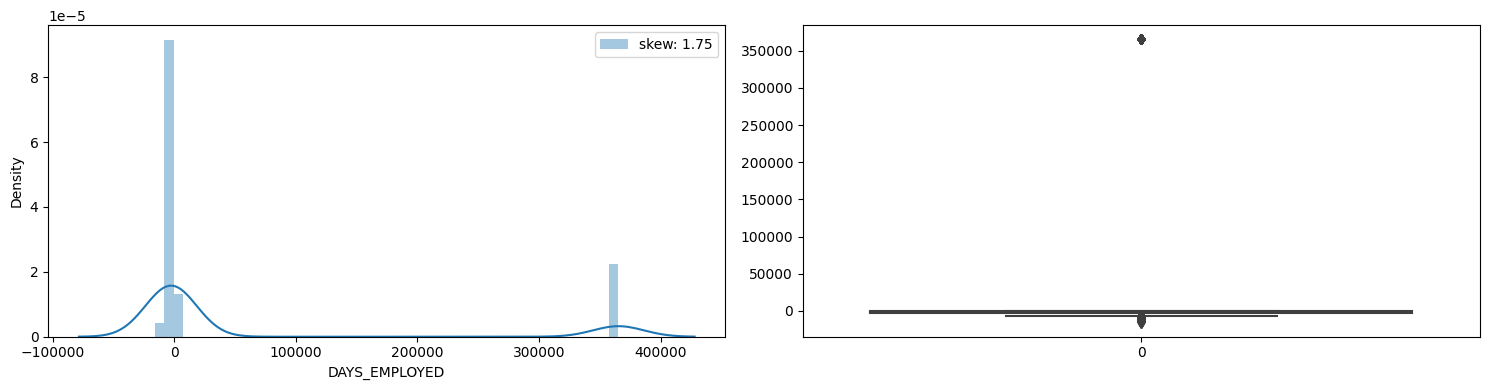

/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/1769665720.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.


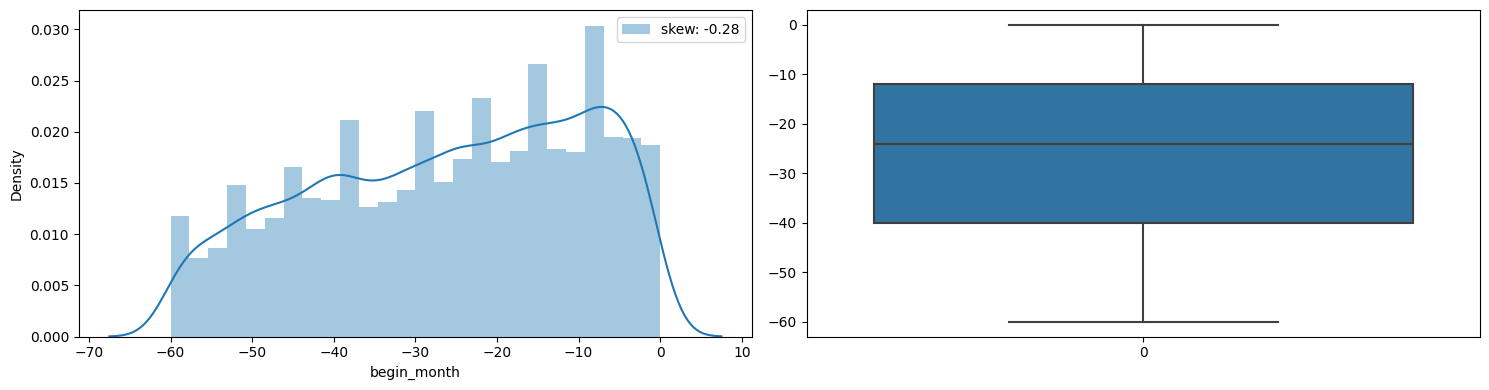

In [28]:
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df_train[col]) # boxplot을 그려 이상치를 확인합니다. 
    plt.tight_layout()
    plt.show()


In [29]:
#그래프들을 통해 시각적으로 이상치들을 확인하고
#describe 함수를 통해 수치적으로 이상치들을 확인한다
print(df_train['income_total'].describe())
print(df_train['DAYS_BIRTH'].describe())
print(df_train['DAYS_EMPLOYED'].describe())
print(df_train['begin_month'].describe())


count     12740.0000
mean     188416.7827
std      103213.9653
min       27000.0000
25%      121500.0000
50%      157500.0000
75%      225000.0000
max     1575000.0000
Name: income_total, dtype: float64
count    12740.0000
mean    -15958.8599
std       4200.8499
min     -25152.0000
25%     -19426.0000
50%     -15519.0000
75%     -12454.0000
max      -7705.0000
Name: DAYS_BIRTH, dtype: float64
count    12740.0000
mean     59971.1496
std     138263.2365
min     -15713.0000
25%      -3150.0000
50%      -1539.0000
75%       -401.0000
max     365243.0000
Name: DAYS_EMPLOYED, dtype: float64
count   12740.0000
mean      -26.1363
std        16.5750
min       -60.0000
25%       -40.0000
50%       -24.0000
75%       -12.0000
max         0.0000
Name: begin_month, dtype: float64


In [30]:
#데이터를 확인한 후에 이상치를 제거하거나 수정한다

# 80만달러 이상 버는 데이터는 80만으로 대체
df_train['income_total'] = df_train['income_total'].apply(lambda x: 800000 if x > 800000 else x) 
#무직상태를 나타내는 365243을 1로 변경
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].replace(365243,1)


#제대로 수정이 되었는지 확인
print(df_train['income_total'].describe(),df_train['DAYS_EMPLOYED'].describe())


count    12740.0000
mean    188022.3557
std     100005.8131
min      27000.0000
25%     121500.0000
50%     157500.0000
75%     225000.0000
max     800000.0000
Name: income_total, dtype: float64 count    12740.0000
mean     -2183.0620
std       2354.2812
min     -15713.0000
25%      -3150.0000
50%      -1539.0000
75%       -401.0000
max          1.0000
Name: DAYS_EMPLOYED, dtype: float64


In [31]:
print(df_train['credit'].value_counts())
proportion = 1576/(1576+11164)
print('low credit ratio : {0}%\nhigh credit ratio : {1}%'.format(proportion*100,(1-proportion)*100))


1    11164
0     1576
Name: credit, dtype: int64
low credit ratio : 12.370486656200942%
high credit ratio : 87.62951334379906%


/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/1487044279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.


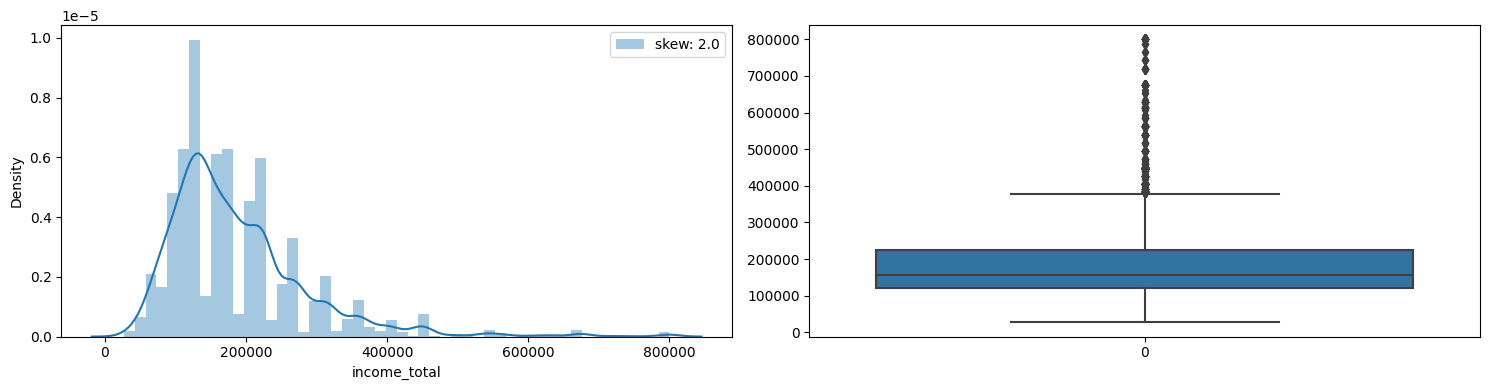

/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/1487044279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.


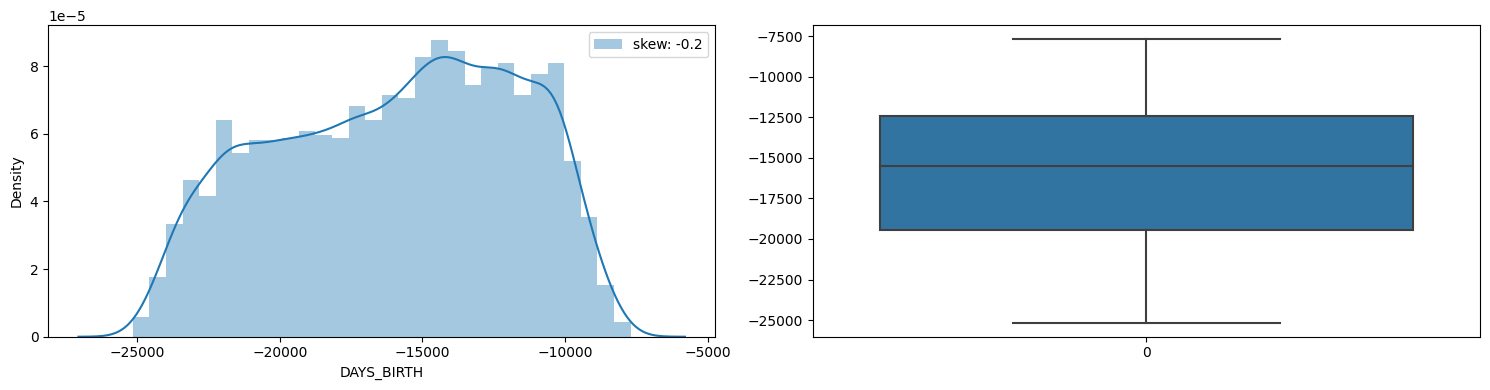

/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/1487044279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.


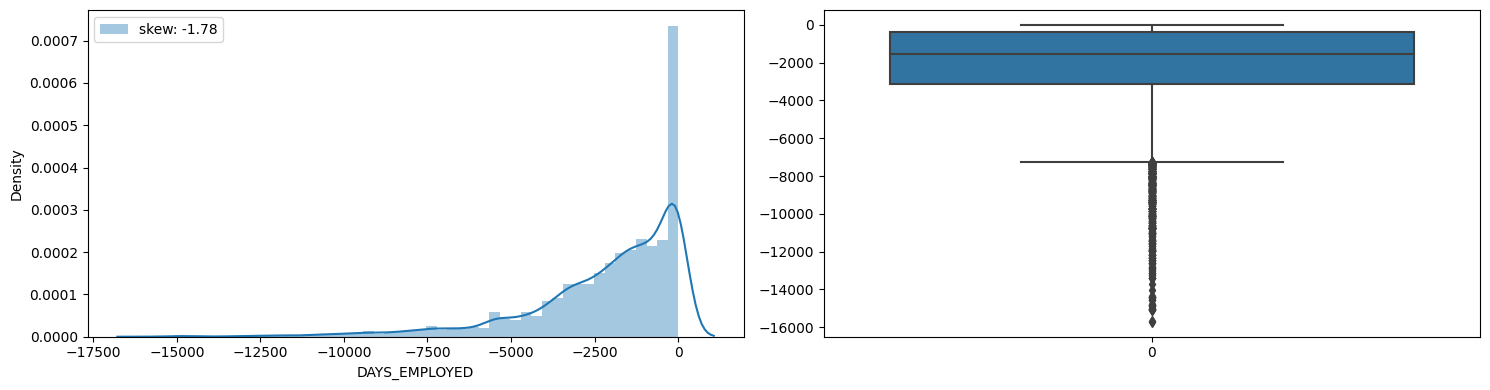

/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/1487044279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.


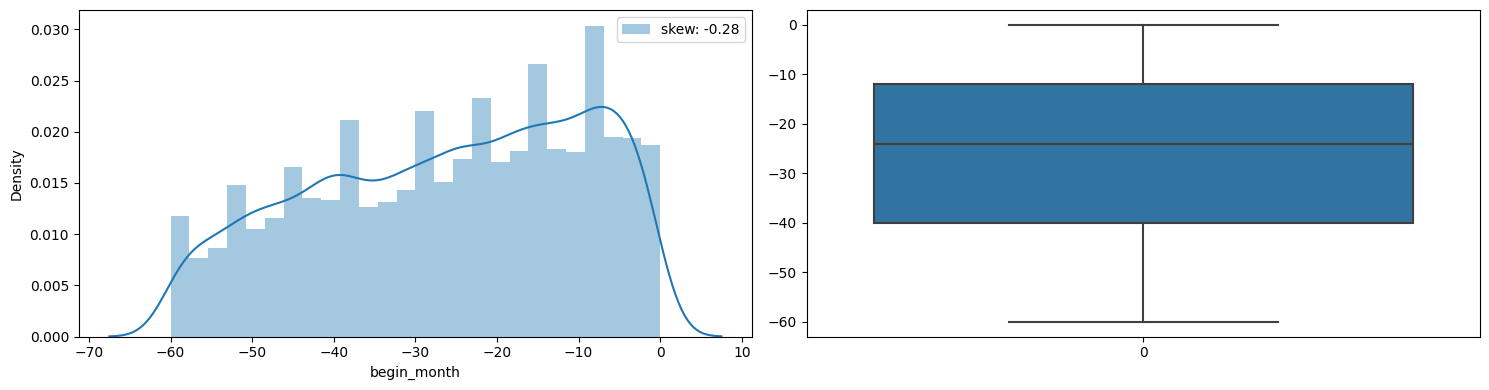

In [32]:
#이상치 제거 및 수정 후 다시 그래프를 확인함으로 이상치 처리가 되었는지 시각적으로 확인한다.
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))  # distplot을 그려 수치형 변수 값의 분포를 봅니다.
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df_train[col]) # boxplot을 그려 이상치를 확인합니다. 
    plt.tight_layout()
    plt.show()


In [33]:
#그래프들을 통해 시각적으로 이상치들을 확인하고
#describe 함수를 통해 수치적으로 이상치들을 확인한다
print(df_train['income_total'].describe())
print(df_train['DAYS_BIRTH'].describe())
print(df_train['DAYS_EMPLOYED'].describe())
print(df_train['begin_month'].describe())

count    12740.0000
mean    188022.3557
std     100005.8131
min      27000.0000
25%     121500.0000
50%     157500.0000
75%     225000.0000
max     800000.0000
Name: income_total, dtype: float64
count    12740.0000
mean    -15958.8599
std       4200.8499
min     -25152.0000
25%     -19426.0000
50%     -15519.0000
75%     -12454.0000
max      -7705.0000
Name: DAYS_BIRTH, dtype: float64
count    12740.0000
mean     -2183.0620
std       2354.2812
min     -15713.0000
25%      -3150.0000
50%      -1539.0000
75%       -401.0000
max          1.0000
Name: DAYS_EMPLOYED, dtype: float64
count   12740.0000
mean      -26.1363
std        16.5750
min       -60.0000
25%       -40.0000
50%       -24.0000
75%       -12.0000
max         0.0000
Name: begin_month, dtype: float64


In [34]:
#이상치 처리 후 df shape를 확인한다
print('이상치 처리 후 shape : {}'.format(df_train.shape))

#index를 맞춰준다
df_train = df_train.reset_index(drop = True)
df_train

#re_train 데이터로 저장
df_train.to_csv('re_train.csv')

이상치 처리 후 shape : (12740, 18)


In [35]:
# 범주형 변수와 연속형 변수가 섞인 데이터의 상관관계 분석
from sklearn import preprocessing
label  = preprocessing.LabelEncoder()

data_encoded = pd.DataFrame()
data_encoded = df_train

#범주형 변수를 지니는 column들을 따로 모아준다.
df_cate = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']

#범주형 변수을 지니는 column들을 fit_transform 함수를 통해 정리해준다
#
#추가 설명이 필요할 거 같습니다!
#
for i in df_cate :
    data_encoded[i]=label.fit_transform(df_train[i])

data_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   credit         12740 non-null  int64  
 1   gender         12740 non-null  int64  
 2   car            12740 non-null  int64  
 3   reality        12740 non-null  int64  
 4   child_num      12740 non-null  int64  
 5   income_total   12740 non-null  float64
 6   income_type    12740 non-null  int64  
 7   edu_type       12740 non-null  int64  
 8   family_type    12740 non-null  int64  
 9   house_type     12740 non-null  int64  
 10  DAYS_BIRTH     12740 non-null  int64  
 11  DAYS_EMPLOYED  12740 non-null  int64  
 12  work_phone     12740 non-null  int64  
 13  phone          12740 non-null  int64  
 14  email          12740 non-null  int64  
 15  occyp_type     12740 non-null  int64  
 16  family_size    12740 non-null  int64  
 17  begin_month    12740 non-null  int64  
dtypes: flo

In [36]:
from scipy.stats import chi2_contingency
import numpy as np

#빈도로 상관관계 분석
def cramers_V(var1,var2):
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers,5)) #소수점을 너무 낮게 하면 아예 0으로 나타나기도 하니 주의!
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index = data_encoded.columns)


#히트맵을 통해 상관관계 시각화



/var/folders/_t/ywwvt_4s489gb9q531db794c0000gn/T/ipykernel_6321/696209601.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


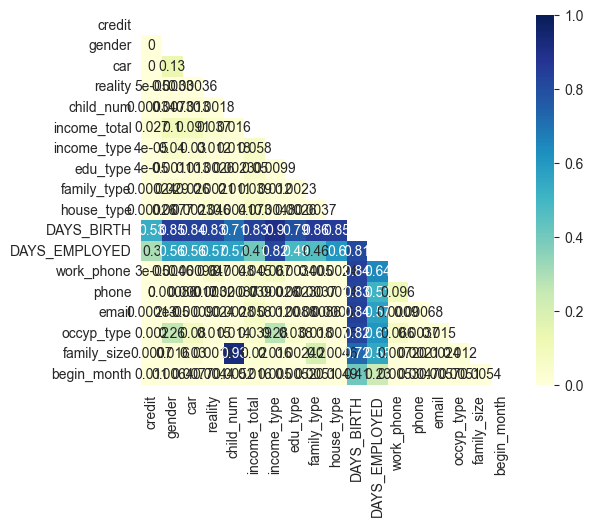

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

#범주형 변수들과 연속형 변수들을 정리한 후에 이들의 상관관계를 히트맵을 통해 확인한다

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(df, mask=mask, vmin=0. , vmax=1, square=True, annot = True, cmap ='YlGnBu')

sns.set(rc={'figure.figsize':(40,40)})
plt.show()


In [38]:
#test 전처리
df_test = df_test.drop_duplicates(keep='first')
df_test=df_test.drop(labels='index',axis=1)
df_test=df_test.drop(labels='FLAG_MOBIL',axis=1)
df_test['occyp_type'] = df_test['occyp_type'].fillna('No')
df_test.loc[(df_test['DAYS_EMPLOYED'] < 0) & (df_test['occyp_type'] == 'No'), 'occyp_type'] = 'Unknown'
df_test['occyp_type'].isnull().sum()# 수치형 변수 columns를 feature에 저장한다.
features = df_test[['income_total','DAYS_BIRTH','DAYS_EMPLOYED','begin_month']]
print('이상치 처리 전 shape : {}'.format(df_test.shape))

df_test['income_total'] = df_test['income_total'].apply(lambda x: 800000 if x > 800000 else x) # 80만달러 이상 버는 데이터는 80만으로 대체
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].replace(365243,1) #무직상태를 나타내는 365243을 1로 변경
print(df_test['income_total'].describe(),df_test['DAYS_EMPLOYED'].describe())
#이상치 처리 후 df shape를 확인한다
print('이상치 처리 후 shape : {}'.format(df_test.shape))
#index를 맞춰준다
df_test = df_test.reset_index(drop = True)
df_test
df_test.to_csv('test_data.csv')

이상치 처리 전 shape : (13229, 17)
count    13229.0000
mean    185462.7150
std      96745.0879
min      27000.0000
25%     121500.0000
50%     157500.0000
75%     225000.0000
max     800000.0000
Name: income_total, dtype: float64 count    13229.0000
mean     -2208.2162
std       2381.0629
min     -15661.0000
25%      -3153.0000
50%      -1537.0000
75%       -410.0000
max          1.0000
Name: DAYS_EMPLOYED, dtype: float64
이상치 처리 후 shape : (13229, 17)


In [39]:
df_test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,M,N,Y,0,211500.0000,Working,Secondary / secondary special,Single / not married,House / apartment,-10072,-1101,1,1,0,Core staff,1,-10
1,F,N,Y,0,157500.0000,Pensioner,Secondary / secondary special,Widow,House / apartment,-24340,1,0,1,0,No,1,-52
2,F,N,Y,0,45000.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15724,-1389,1,1,0,Sales staff,2,-15
3,M,N,Y,2,270000.0000,Working,Secondary / secondary special,Single / not married,House / apartment,-11505,-4019,0,0,0,Laborers,3,-24
4,F,N,Y,0,202500.0000,Working,Secondary / secondary special,Married,House / apartment,-15929,-2879,0,1,0,Laborers,2,-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,F,N,Y,0,202500.0000,Working,Secondary / secondary special,Married,House / apartment,-12347,-2057,0,0,0,Laborers,2,-30
13225,M,N,Y,0,148500.0000,Commercial associate,Higher education,Single / not married,House / apartment,-9382,-2049,0,1,1,Medicine staff,1,-24
13226,M,N,Y,0,270000.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-14896,-5420,0,0,1,Drivers,2,-26
13227,M,N,Y,0,405000.0000,Working,Higher education,Married,House / apartment,-15881,-4781,1,0,0,Laborers,2,-30
